## Import libraries and data

In [39]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import r2_score
import pmdarima as pm
import math

### Import data

In [3]:
cwd = os.getcwd()
simp_path = 'raw_data/df.csv'
abs_path = os.path.abspath(os.path.join(cwd,'..',simp_path))
df_sarimax = pd.read_csv(abs_path)

In [4]:
#cheking my dataframe
df_sarimax.head()

,ticker,open,close,adj_close,low,high,volume,date,sector
0,AAPL,0.513393,0.513393,0.023186,0.513393,0.515625,117258400,1980-12-12,TECHNOLOGY
1,AAPL,0.488839,0.486607,0.021977,0.486607,0.488839,43971200,1980-12-15,TECHNOLOGY
2,AAPL,0.453125,0.450893,0.020364,0.450893,0.453125,26432000,1980-12-16,TECHNOLOGY
3,AAPL,0.462054,0.462054,0.020868,0.462054,0.464286,21610400,1980-12-17,TECHNOLOGY
4,AAPL,0.475446,0.475446,0.021473,0.475446,0.477679,18362400,1980-12-18,TECHNOLOGY


### Transforming the data into a datetime format

In [5]:
# Transforming the data into a datetime format
df_sarimax["date"] = pd.to_datetime(df_sarimax["date"], infer_datetime_format=True)
df_sarimax.head()

,ticker,open,close,adj_close,low,high,volume,date,sector
0,AAPL,0.513393,0.513393,0.023186,0.513393,0.515625,117258400,1980-12-12,TECHNOLOGY
1,AAPL,0.488839,0.486607,0.021977,0.486607,0.488839,43971200,1980-12-15,TECHNOLOGY
2,AAPL,0.453125,0.450893,0.020364,0.450893,0.453125,26432000,1980-12-16,TECHNOLOGY
3,AAPL,0.462054,0.462054,0.020868,0.462054,0.464286,21610400,1980-12-17,TECHNOLOGY
4,AAPL,0.475446,0.475446,0.021473,0.475446,0.477679,18362400,1980-12-18,TECHNOLOGY


### Setting a new data index for my dataframe

In [6]:
#Setting a new data index for my dataframe 
df_sarimax.reset_index()
df_sarimax = df_sarimax.set_index(df_sarimax["date"])
df_sarimax = df_sarimax.drop("date", axis=1)
df_sarimax.head()

,ticker,open,close,adj_close,low,high,volume,sector
date,,,,,,,,
1980-12-12,AAPL,0.513393,0.513393,0.023186,0.513393,0.515625,117258400,TECHNOLOGY
1980-12-15,AAPL,0.488839,0.486607,0.021977,0.486607,0.488839,43971200,TECHNOLOGY
1980-12-16,AAPL,0.453125,0.450893,0.020364,0.450893,0.453125,26432000,TECHNOLOGY
1980-12-17,AAPL,0.462054,0.462054,0.020868,0.462054,0.464286,21610400,TECHNOLOGY
1980-12-18,AAPL,0.475446,0.475446,0.021473,0.475446,0.477679,18362400,TECHNOLOGY


## Decomposition of my selected Stock

### Filtering the date after 2000

In [7]:
df_sarimax = df_sarimax[(df_sarimax.index)>"1999-12-31"]
df_sarimax.head()

,ticker,open,close,adj_close,low,high,volume,sector
date,,,,,,,,
2000-01-03,AAPL,3.745536,3.997768,2.686497,3.631696,4.017857,133949200,TECHNOLOGY
2000-01-04,AAPL,3.866071,3.660714,2.459998,3.613839,3.950893,128094400,TECHNOLOGY
2000-01-05,AAPL,3.705357,3.714286,2.495997,3.678571,3.948661,194580400,TECHNOLOGY
2000-01-06,AAPL,3.790179,3.392857,2.279998,3.392857,3.821429,191993200,TECHNOLOGY
2000-01-07,AAPL,3.446429,3.553571,2.387998,3.410714,3.607143,115183600,TECHNOLOGY


### Selecting the stock "T": telekom to work with it 

In [8]:
#Selecting the stock "T": Telekom to work with it 
df_telekom = df_sarimax[df_sarimax["ticker"]== "T"]
df_telekom.head()

,ticker,open,close,adj_close,low,high,volume,sector
date,,,,,,,,
2000-01-03,T,48.5625,47.0000,19.225044,46.6250,49.00,5791900,PUBLIC UTILITIES
2000-01-04,T,47.0625,44.2500,18.100174,43.5000,47.75,7173600,PUBLIC UTILITIES
2000-01-05,T,45.0000,44.9375,18.381397,44.4375,45.25,9090000,PUBLIC UTILITIES
2000-01-06,T,44.5625,43.7500,17.993273,43.1250,45.00,7153600,PUBLIC UTILITIES
2000-01-07,T,44.5625,44.1250,18.147497,43.3750,44.75,5885600,PUBLIC UTILITIES


### Checking the additive decomposition (y = Trend * Seasonal * Residuals) 

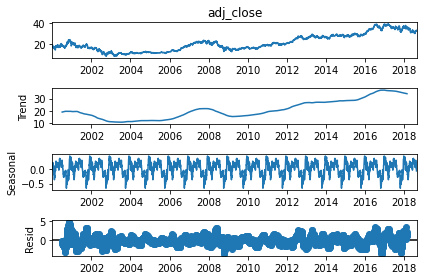

In [9]:
#periods 5(weekly), 20(monthly), 253(yearly)
result_add_T = seasonal_decompose(df_telekom['adj_close'], model='additive', period=253)
result_add_T.plot();

#### Plotting the residuals from additive decomposition

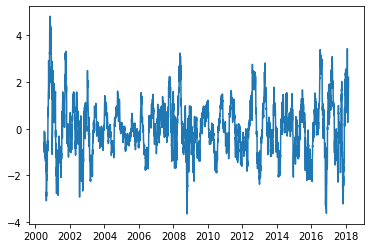

In [10]:
#Plot the residuals from additive
plt.plot(result_add_T._resid);

In [11]:
#Removing nan values from additive
result_observed_add=result_add_T.resid.dropna()

#### Test with Dickey Fuller the additive

In [12]:
#Test with dickey fuller test additive
adfuller(result_observed_add)[1]

1.1473483148038672e-14

### Checking the multiplicative decomposition (y = Trend * Seasonal * Residuals)

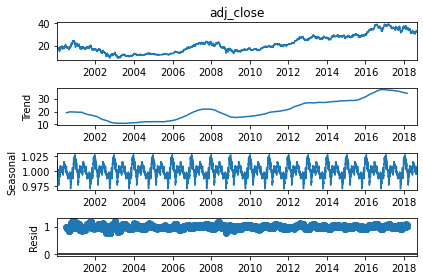

In [13]:
#Multiplicative Decomposition
result_mult_T = seasonal_decompose(df_telekom['adj_close'], model='multiplicative', period=253)
result_mult_T.plot();

#### Plotting the residuals from multiplicative decomposition

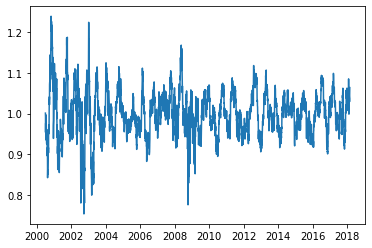

In [14]:
#Plot the residuals from multiplicative
plt.plot(result_mult_T._resid);

In [15]:
#Removing nan values from multiplicative
result_observed_mult=result_mult_T.resid.dropna()

#### Test with Dickey Fuller the multiplicative

In [16]:
#Test with dickey fuller test multiplicative
adfuller(result_observed_mult)[1]

1.1976801680390142e-13

## Autocorrelation

### Plotting additive autocorrelation

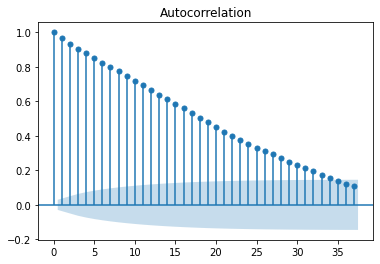

In [17]:
#plot the additive residuals with acf 
plot_acf(result_observed_add);

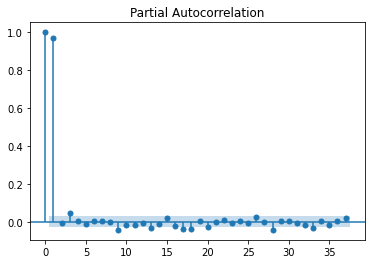

In [18]:
#plot the additive residuals with pacf 
plot_pacf(result_observed_add);

### Plotting multiplicative autocorrelation

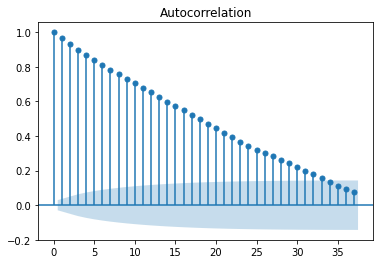

In [19]:
#plot the multiplicative residuals with acf 
plot_acf(result_observed_mult);

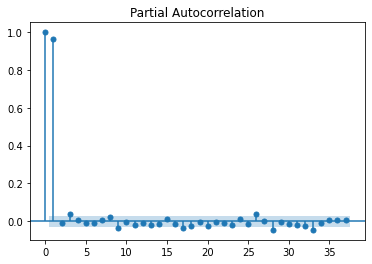

In [20]:
#plot the multiplicative residuals with pacf 
plot_pacf(result_observed_mult);

## Splitting the data (train/test)

In [21]:
#Split the data in train / test 
df_telekom_train = df_telekom[:"2014"]
df_telekom_test = df_telekom["2015":]
print(df_telekom_train.shape)
print(df_telekom_test.shape)

(3773, 8)
(919, 8)


### Plotting the data

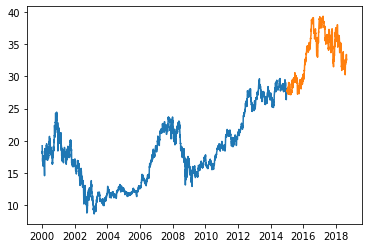

In [30]:
#plot the data sets
plt.plot(df_telekom_train.adj_close)
plt.plot(df_telekom_test.adj_close);

## Building Auto ARIMA model

In [31]:
arima_model = pm.auto_arima(df_telekom_train.adj_close,
                           m=7,
                           seasonal=True,
                           stepwise=True,
                           start_p=0, max_p=5,
                           start_d=0, max_d=5,
                           start_q=0, max_q=5,
                           start_P=0, max_P=5,
                           start_D=0, max_D=5,
                           start_Q=0, max_Q=5,
                           error_action="warn", trace=True,
                           supress_warnings=True,
                           n_jobs=-1, random_state=20, n_fits=50)
print(arima_model.summary())

/home/luis/.pyenv/versions/3.8.6/envs/stock_prices_predictions/lib/python3.8/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1490.191, Time=0.60 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1493.914, Time=2.87 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1493.876, Time=3.19 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1488.405, Time=0.25 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=1492.170, Time=1.27 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=1492.168, Time=2.20 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=1494.071, Time=2.23 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1491.939, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1491.904, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=1477.361, Time=2.41 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=1479.106, Time=10.02 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=1479.088, Time=21.15 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=1481.333, Time=37.53 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=1473.300, Time=12.18 sec
 ARIMA(2,1,1)(1,0,0)[7] inter

## Forecasting on the test data

In [42]:
#Specify training data
data = df_telekom_train["adj_close"]
#Define the model configuration
my_order = (1, 1, 2)
my_seasonal_order = (0, 0, 0, 7)
#Define the model #replace with data
model_sarimax = SARIMAX(data, order=my_order, seasonal_order=my_seasonal_order)
#Fit the model 
model_fit = model_sarimax.fit()

/home/luis/.pyenv/versions/3.8.6/envs/stock_prices_predictions/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/luis/.pyenv/versions/3.8.6/envs/stock_prices_predictions/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [ ]:
#Forecast
n_periods = len(df_telekom_test["adj_close"])
forecast = model_fit.get_forecast(steps = n_periods)
index_y_test = df_telekom_test.index 